<a href="https://colab.research.google.com/github/Mohammad-Amirifard/Intrusion_Detection/blob/main/Part5_MLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection Using Machine Learning Techniques On CIC-IDS2017 Dataset**

Created By [Mohammad Amirifard](https://www.linkedin.com/in/mohammad-amirifard/)


<img src="https://www.teligentsolutions.com/wp-content/uploads/2015/04/Teligent_Solutions_Intrusion_Detection.jpg" alt="Image" />

# **Structure of notebooks**
`This program includes several notebooks regarding different parts.`

This is **notebook number 5**, called **Part5_MLP_Model**

For other notebooks you can use the following links:





1.   Notebook number 1, [Part1_EDA](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part1_EDA.ipynb)
2.   Notebook number 2, [Part2_KNN_Models](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part2_KNN_Models.ipynb)
3.   Notebook number 3, [Part3_SVM_Models](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part3_SVM_Models.ipynb)
4.   Notebook number 4, [Part4_Gboost_Model](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part4_GBoost_Model.ipynb)
5.   Notebook number 5, [Part5_MLP_Model](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part5_MLP_Model.ipynb)
6.   Notebook number 6, [Part6_Conclusion]()



# **Problem Statement**
The objective of this project is to **detect** and classify various types of **anomalies** within the `CIC-IDS2017 dataset`, which is a widely recognized benchmark dataset used for cybersecurity research, particularly in the domain of intrusion detection systems (IDS). Anomalies in this context refer to unusual or suspicious patterns in the network traffic data that may indicate potential security threats such as attacks or intrusions.

To achieve this, we will apply a range of **machine learning techniques** that are commonly used for anomaly detection and classification tasks. These techniques include, but are not limited to, supervised learning methods, such as decision trees, support vector machines, and neural networks, as well as unsupervised learning approaches like clustering algorithms and autoencoders. By leveraging these methods, we aim to accurately classify network traffic data into normal and anomalous categories.

The problem we are addressing is inherently a classification problem, where the primary goal is to categorize the data into predefined classes based on the learned patterns. This involves training machine learning models on labeled data to distinguish between normal and anomalous network traffic, enabling the detection of potential security threats with high precision and recall.

**Goal:**

Our ultimate aim is to develop a robust system that can effectively identify various types of anomalies, contributing to the enhancement of network security measures.

**Dataset:**

you can see detail of available dataset on this [link](https://www.unb.ca/cic/datasets/ids-2017.html)

# **Table of Content**



<div class="toc" style="background-color: #d4d0cf; padding: 10px; border-radius: 5px;">
  <h2 style="color: black;"></h2>
  <ul>
    <li style="color: black;">Import Libraries</li>
    <li style="color: black;">Download Clean CIC-IDS2017 Dataset</li>
    <li style="color: black;">Load datasets</li>
    <li style="color: black;">Encode Labels</li>
    <li style="color: black;">Split dataset</li>
    <li style="color: black;">Normalize Data</li>
    <li style="color: black;">Performance function</li>
    <li style="color: black;">Perfomance Plot</li>
    <li style="color: black;">MLP Model
    </li>
    <li style="color: black;">MLP Model Performance</li>
  </ul>
</div>


# **Import Libraries**

Here we import libraries on which we need to work.

In [ ]:
!pip install -qq gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os, gdown
import zipfile, time
import warnings
import joblib
warnings.filterwarnings('ignore')


# **Download Clean CIC-IDS2017 Dataset**

Here we download dataset from google drive and try to unzip it. This is not the main dataset. This is the clean dataset obtained from Part 1.

In [ ]:
def download_file_from_google_drive(file_id, destination):

    """
    Input: file_id (Obtained from google drive), destionation (For saving the file)
    Output: _ (Download the file in destination directory)
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destination, quiet=True) # download file using given URL


def unzip_dataset(extraction_dir):

  """
  Input: Extraction_dir (Direction of dataset to unzip into)
  Output: _ (Exract the zip file in the given direction)
  """

  # Ensure the extraction directory exists
  os.makedirs(extraction_dir, exist_ok=True)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extraction_dir)



# Setup variables to download dataset
current_working_dir = os.getcwd()
destination = current_working_dir
zip_file_path = os.path.join(destination, 'clean_dataset.zip')
file_id =  '1CG1DqRkNUBAOTcmT-eSg9fHMWy3FQacl' # File Id
extraction_dir = os.path.join(destination,'dataset/')
# call functions
download_file_from_google_drive(file_id, zip_file_path) # Download
print('clean_dataset.zip was downloaded successfuly.')
unzip_dataset(extraction_dir)                           # Unzip
print('clean_dataset.zip  was unziped successfuly.')

clean_dataset.zip was downloaded successfuly.
clean_dataset.zip  was unziped successfuly.


# **Load datasets**
On this [link](https://www.unb.ca/cic/datasets/ids-2017.html), You can access all information you need about dataset.

In [ ]:
# Let's load all csv files.
initial_time = time.time()
clean_df = pd.read_csv(os.path.join(extraction_dir,'clean_df.csv'))
# Shuffling the dataframe
clean_df = clean_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Here for not wasting time we choose a part of dataset.
no_sample_to_model = 500000 # Samples
clean_df =clean_df[:no_sample_to_model]


# Load best features obtained from EDA part
best_feature_list_from_MI = np.load(os.path.join(extraction_dir,'best_feature_list_from_MI.npy'),allow_pickle =True)
best_feature_list_from_Anova = np.load(os.path.join(extraction_dir,'best_feature_list_from_Anova.npy'),allow_pickle =True)
best_feature_list_from_RF = np.load(os.path.join(extraction_dir,'best_feature_list_from_RF.npy'),allow_pickle =True)

In [ ]:
# Let's see one of them.
display(clean_df)

,Flow Duration,Total Backward Packets,Total Length of Bwd Packets,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Packets/s,Flow IAT Std,Flow IAT Min,...,Bwd Avg Bulk Rate,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_backward,min_seg_size_forward,Active Std,Active Min,Idle Std,Idle Min,Label
0,134,2,96,32,0.000000,48,0.000000,29850.746270,7.216878e+01,3,...,0,64,96,-1,32,0.0,0,0.0,0,BENIGN
1,29,1,6,0,0.000000,6,0.000000,68965.517240,0.000000e+00,29,...,0,0,6,0,40,0.0,0,0.0,0,PortScan
2,4,0,0,0,0.000000,0,0.000000,750000.000000,1.414214e+00,1,...,0,0,0,-1,32,0.0,0,0.0,0,BENIGN
3,82052747,6,11607,0,5.656854,0,2177.344966,0.170622,1.980000e+07,0,...,0,56,11607,229,20,0.0,1000,43600000.0,9985727,DDoS
4,1408725,4,3619,0,39.244426,0,701.785995,8.518341,3.200900e+05,9,...,0,111,3619,35466,20,0.0,0,0.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,44,1,6,0,0.000000,6,0.000000,45454.545450,0.000000e+00,44,...,0,0,6,0,40,0.0,0,0.0,0,PortScan
499996,74,1,0,0,17.897858,0,0.000000,54054.054050,2.182506e+01,1,...,0,31,0,0,20,0.0,0,0.0,0,BENIGN
499997,184627,4,360,30,5.773503,56,39.259818,43.330607,6.148513e+04,3,...,0,140,360,-1,20,0.0,0,0.0,0,BENIGN
499998,183,2,288,36,0.000000,144,0.000000,21857.923500,1.004589e+02,3,...,0,72,288,-1,20,0.0,0,0.0,0,BENIGN


# **Encoding Labels**

In [ ]:
# Here we check that ,per class, there are at least 2 samples. Otherwise we remove that class from dataset.
no_of_classes = len(np.unique(clean_df[' Label'],return_counts=True)[0])
print('No of clasees: ',no_of_classes)
print('No items in each clasess:')
print(np.unique(clean_df[' Label'],return_counts=True))
classes , classes_samples = np.unique(clean_df[' Label'],return_counts=True)



claess_with_one_sample = []
for index,sample in enumerate(classes_samples):
  if sample==1:
    claess_with_one_sample.append(classes[index])

if len(claess_with_one_sample)>=1:

  for item in claess_with_one_sample:
    clean_df = clean_df.drop(index = clean_df[clean_df[' Label']==item].index, axis=1)

  print('*'*100)
  print('After removing those classes with just one sample, we have:')
  print('No of clasees: ',len(np.unique(clean_df[' Label'],return_counts=True)[0]))
  print('No items in each clasess:')

else:
    print('*'*100)
    print('In this selected part of dataset, there is no class having one sample as evidence. So, it means all classes have more than one sample as their evidence.')



no_of_classes , classes_samples = np.unique(clean_df[' Label'],return_counts=True)
np.unique(clean_df[' Label'],return_counts=True)

No of clasees:  5
No items in each clasess:
(array(['BENIGN', 'Botnet', 'DDoS', 'Exploitation', 'PortScan'],
      dtype=object), array([438164,    379,  24887,   5840,  30730]))
****************************************************************************************************
In this selected part of dataset, there is no class having one sample as evidence. So, it means all classes have more than one sample as their evidence.


(array(['BENIGN', 'Botnet', 'DDoS', 'Exploitation', 'PortScan'],
       dtype=object),
 array([438164,    379,  24887,   5840,  30730]))

In [ ]:
# We need to encode labels.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(clean_df[' Label'])
clean_df[' Label'] = encoded_labels
print('After Encoding:')
classes , class_samples = np.unique(clean_df[' Label'],return_counts=True)
no_of_classes = len(classes)
dataframe = pd.DataFrame({'Classes':classes,'Samples per class':class_samples})
display(dataframe)



After Encoding:


,Classes,Samples per class
0,0,438164
1,1,379
2,2,24887
3,3,5840
4,4,30730


# **Split dataset**
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <img src="https://drive.google.com/uc?export=view&id=1zn-wpJgfOO6Pa_w-Kk35BgwNwwPm70gh" width="50%">
</body>
</html>



In [ ]:
from sklearn.model_selection import train_test_split
def spliting(df, best_feature_list):


  test_size = 0.2 # 20%
  X = df[best_feature_list]
  y  = df[' Label']

  our_X_train, our_x_test, our_y_train, our_y_test = train_test_split(X,y,test_size=test_size, stratify=y,random_state=True)
  print('X_train.shape:',our_X_train.shape)
  print('x_test.shape:',our_x_test.shape)
  print('y_train.shape:',our_y_train.shape)
  print('y_test.shape:',our_y_test.shape)
  no_of_anomalies_in_test_part = np.where(our_y_test!=0)[0].shape[0]
  no_of_normal_points_in_test_part = np.where(our_y_test==0)[0].shape[0]
  no_of_anomalies_in_train_part = np.where(our_y_train!=0)[0].shape[0]
  no_of_normal_points_in_train_part = np.where(our_y_train==0)[0].shape[0]

  print(f'In the train dataset we have:{no_of_anomalies_in_train_part} anomalies with this distribution {np.unique(our_y_train,return_counts=True)[1]}and {no_of_normal_points_in_train_part} normal points')
  print(f'In the test dataset we have:{no_of_anomalies_in_test_part} anomalies with this distribution {np.unique(our_y_test,return_counts=True)[1]} and {no_of_normal_points_in_test_part} normal points')
  print('*'*100)
  return our_X_train, our_x_test, our_y_train, our_y_test

# **Normalizing with MinMaxSclaer**


### MinMaxScaler Formula

The MinMaxScaler scales each feature to a given range, typically between 0 and 1. The formula for MinMax scaling is:

$[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
]$

Where:
- $( X $) is the original value.
- $( X_{\text{min}} $) is the minimum value of the feature.
- $( X_{\text{max}} $) is the maximum value of the feature.
- $( X_{\text{scaled}} $) is the scaled value.

The resulting $( X_{\text{scaled}} $) will be within the range [0, 1] (by default).




In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalizing(X_train, x_test):

  scaler = MinMaxScaler ()
  our_X_train = scaler.fit_transform(X_train)
  our_x_test = scaler.transform(x_test)
  print('After Normalizing we have:')
  print('X_train_normalized.shape:',our_X_train.shape)
  print('x_test_normalized.shape:',our_x_test.shape)
  print('*'*100)

  return our_X_train, our_x_test

# **Performance function**

### For our models, we result; Precision, Recall, and F1 Score Formulas


$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} $



$ \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}} $



$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

Also, we collect `training time` and `prediciting time` and `multicalsss confusion matirx`.






In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

def performance(model_name,y_test,y_pred,clean_df,train_time,pred_time):

  """This function tries to calculate the Precesion, Recall, and F1_score for each given model.\
  Input: model_name,y_test,y_pred,clean_df,train_time,pred_time for each model we will create in the future.
  Output: styled_df (Which is just for view),df (which is used for more access in the futrue.)
  """

  labels = [f'Class-{index}' for index in range(len(np.unique(clean_df[' Label'])))]

  report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
  report_df = pd.DataFrame(report).transpose()

  precision =report_df['precision'].values
  recall =report_df['recall'].values
  f1_score =report_df['f1-score'].values
  support = report_df['support'].values



  # Creating the DataFrame
  data = {
      'Precision': precision,
      'Recall': recall,
      'F1_Score': f1_score,
      'Support':support,
      'Training_Time':train_time,
      'Predicting_Time':pred_time

  }

  # Using a MultiIndex for the rows
  index = pd.MultiIndex.from_product([[model_name], labels+['accuracy','macro avg','weighted avg']], names=['Model_name', 'Classes'])

  df = pd.DataFrame(data, index=index)

  # Using Styler to merge cells in 'Column3'
  def highlight_merge(s):

      return ['background-color: #dcdcdc '] * len(s) if pd.notna(s.iloc[0]) else ['display: none'] * len(s)


  styled_df = df.style.apply(highlight_merge, subset=['Training_Time','Predicting_Time'], axis=1)



  # Displaying the styled DataFrame
  display(styled_df)

  return styled_df,df




#**Perfomance Plot**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(model_names, F1_Score_Macro_Avg_list, F1_Score_Weighted_Avg_list, Accuracy_list):

    species = model_names
    penguin_means = {
        'F1_Score_Macro_Avg': F1_Score_Macro_Avg_list,
        'F1_Score_Weighted_Avg': F1_Score_Weighted_Avg_list,
        'Accuracy': Accuracy_list
    }

    x = np.arange(len(species))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained',figsize=(8,5))

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)

        # Set different padding and alignment for each set of bars
        ax.bar_label(rects, padding=6 + multiplier * 9, label_type='edge')

        multiplier += 1

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Models Performance')
    ax.set_xticks(x + (width * 1.5), species)  # Adjusted for better alignment
    ax.legend(loc='upper left', ncols=3)

    # Optionally, set y-axis limits and grid
    ax.set_ylim(0, 1.3)
    plt.grid()

    plt.show()




# **MLP Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model

2024-08-15 17:04:36.397697: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 17:04:36.397832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 17:04:36.570789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:


# Step0) Hyperparameters

no_neurons_1 = 64
no_neurons_2 = 128
no_neurons_3 = 128
dropout_rate = 0.2
epoch = 10
batch_size = 32
learning_rate = 0.0001
activation ='relu'

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for MLP using best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= clean_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)


# Step4) Define Model
def mlp_model(X_train_normalized,no_neurons_1,no_neurons_2,activation,dropout_rate,learning_rate,no_of_classes):

  input_shape = X_train_normalized.shape[1]
  input = keras.Input(shape=(input_shape,),name='Input')
  first_layer = layers.Dense(units = no_neurons_1,activation=activation,name='1st_hidden_layer')(input)
  dropout_layer_1 =  layers.Dropout(dropout_rate,name='dropout_layer_1')(first_layer)
  second_layer = layers.Dense(units = no_neurons_2,activation=activation,name='2nd_hidden_layer')(dropout_layer_1)
  dropout_layer_2 =  layers.Dropout(1.5* dropout_rate,name='dropout_layer_2')(second_layer)
  third_layer = layers.Dense(units = no_neurons_3,activation=activation,name='3rd_hidden_layer')(dropout_layer_2)
  output = layers.Dense(units = no_of_classes,activation='softmax',name='Output')(third_layer)

  # Create model
  model = keras.Model(inputs=input, outputs=output, name="mlp_model")
  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])
  model.summary()

  return model

# Step5) Call Model
mlp_model = mlp_model(X_train_normalized,no_neurons_1,no_neurons_2,activation,dropout_rate,learning_rate,no_of_classes)
plot_model(mlp_model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True,dpi=100)


# Step6) Fit and Predict
start_time = time.time()
history = mlp_model.fit(X_train_normalized, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)
stop_time = time.time()
train_time = (stop_time-start_time)/60


# Step7) Call Performance
start_time = time.time()
y_pred_proba = mlp_model.predict(x_test_normalized)
y_pred = np.argmax(y_pred_proba, axis=1)
stop_time = time.time()
pred_time = (stop_time-start_time)/60

print('*'*40,'Performance Table','*'*40)
_,mlp_performance_df  = performance('MLP',y_test,y_pred,clean_df,train_time,pred_time)
print(f'\nIt takes you  {int((time.time() - initial_time)/60)}minutes to see MLP')

# Step8) Save model performance
current_working_dir = os.getcwd()
os.makedirs(os.path.join(current_working_dir,'Models_results'),exist_ok=True)
Models_results_folder = os.path.join(current_working_dir,'Models_results')
mlp_performance_df.to_csv(os.path.join(Models_results_folder,'MLP_performance_df.csv'),index=True)

This result is for MLP using best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (400000, 20)
x_test.shape: (100000, 20)
y_train.shape: (400000,)
y_test.shape: (100000,)
In the train dataset we have:49469 anomalies with this distribution [350531    303  19910   4672  24584]and 350531 normal points
In the test dataset we have:12367 anomalies with this distribution [87633    76  4977  1168  6146] and 87633 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (400000, 20)
x_test_normalized.shape: (100000, 20)
****************************************************************************************************


Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_hidden_layer (Dense)        │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_1 (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_hidden_layer (Dense)        │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 3rd_hidden_layer (Dense)        │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,821 (104.77 KB)

 Trainable params: 26,821 (104.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9083 - loss: 0.3639 - val_accuracy: 0.9634 - val_loss: 0.1168
Epoch 2/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9631 - loss: 0.1234 - val_accuracy: 0.9746 - val_loss: 0.0912
Epoch 3/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9706 - loss: 0.1055 - val_accuracy: 0.9769 - val_loss: 0.0836
Epoch 4/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9740 - loss: 0.0947 - val_accuracy: 0.9774 - val_loss: 0.0804
Epoch 5/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9744 - loss: 0.0911 - val_accuracy: 0.9780 - val_loss: 0.0775
Epoch 6/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9747 - loss: 0.0871 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 7/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9752 - loss: 0.0831 - val_accuracy: 0.9785 - val_loss: 0.0703
Epoch 8/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 


It takes you  4minutes to see MLP


# **MLP Model Performance**

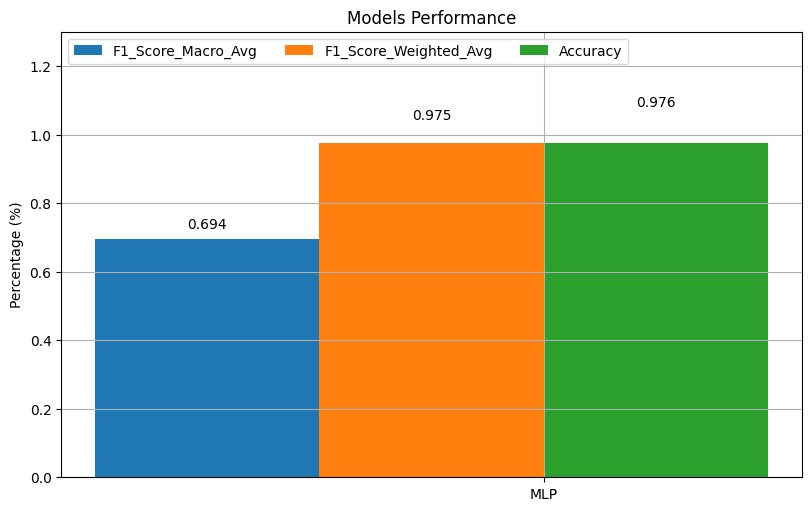

In [ ]:
# Let's see the the performance of MLP in a plot
model_names =  ['MLP']
Accuracy_list = list(np.round([mlp_performance_df['F1_Score'][-3]],3))
F1_Score_Macro_Avg_list= list(np.round([mlp_performance_df['F1_Score'][-2]],3))
F1_Score_Weighted_Avg_list = list(np.round([mlp_performance_df['F1_Score'][-1]],3))
plot_performance(model_names, F1_Score_Macro_Avg_list, F1_Score_Weighted_Avg_list,Accuracy_list)

In [ ]:
last_time =  time.time()
print(f'This notebook takes {int((last_time-initial_time)/60)} minutes of your time.')

This notebook takes 4 minutes of your time.
